In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customer-device-usage/Ecommerce Customers
/kaggle/input/machine-learning-project-basic-linear-regression/__results__.html
/kaggle/input/machine-learning-project-basic-linear-regression/__output__.json
/kaggle/input/machine-learning-project-basic-linear-regression/custom.css
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__results___38_1.png
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__results___43_2.png
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__results___14_2.png
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__results___10_2.png
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__results___16_1.png
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__results___20_2.png
/kaggle/input/machine-learning-project-basic-linear-regression/__results___files/__result

# Business Objective

Should the company prioritize further development of its mobile app or invest more in enhancing the website?

In [2]:
df = pd.read_csv('/kaggle/input/ecommerce-customer-device-usage/Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [ ]:
df.info()

In [5]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Visualization

In [16]:
df_num = df.select_dtypes(exclude = ['object'])

<Axes: >

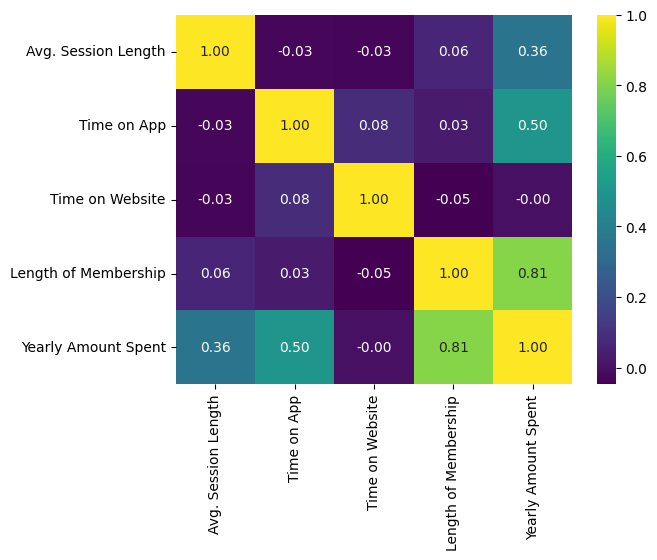

In [19]:
sns.heatmap(df_num.corr(), annot = True, cmap = 'viridis', fmt = '.2f')

compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


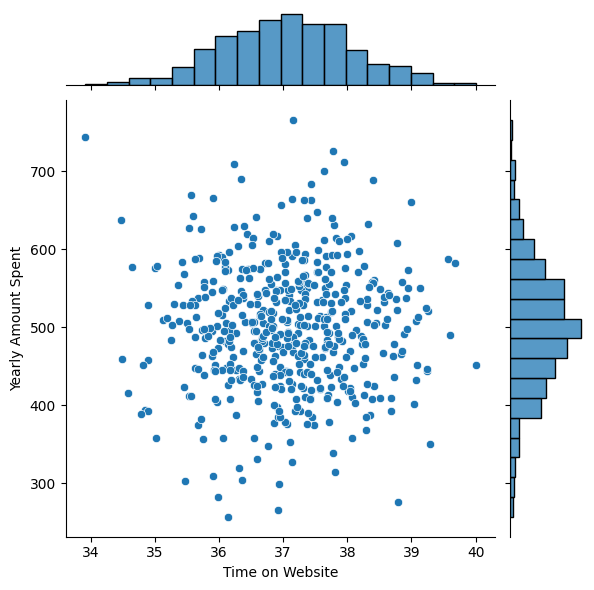

In [10]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

Time one App

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


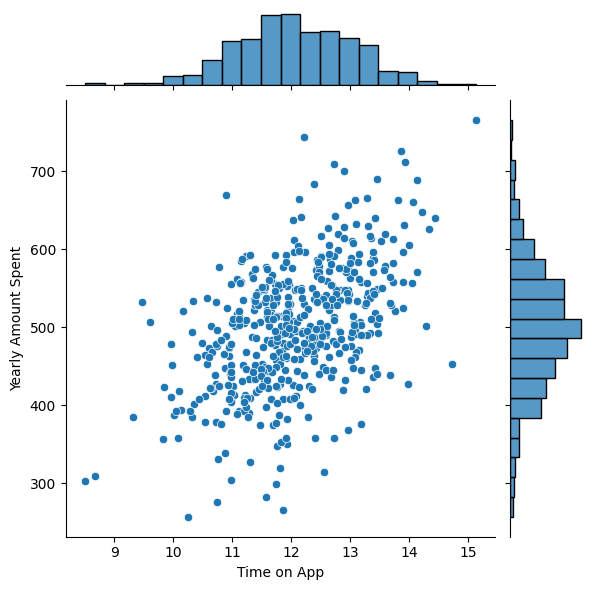

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

Length of Membership vs Yearly Amt Spent

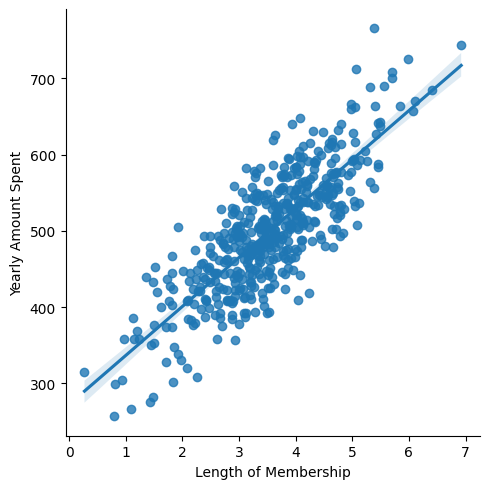

In [14]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

# Training the Linear regression model

In [20]:
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [21]:
y = df['Yearly Amount Spent']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

# Prediction Accuracy

In [32]:
y_pred = lr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

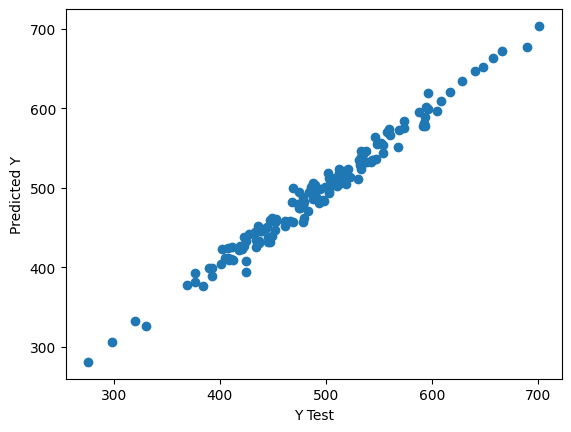

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mse = mean_squared_error(y_test,y_pred)
mse

103.91554136503333

In [39]:
mae = mean_absolute_error(y_test,y_pred)
mae

8.426091641432116

In [40]:
r2 = r2_score(y_test,y_pred)
r2

0.9808757641125855

We got a 98.08% R² score, which indicates that 98.08% of the variance in the dependent variable can be explained by the independent variables in the model. This suggests that the model has a very high level of accuracy in predicting the target variable."

# Residuals

Lets check if the residuals are normally distributed or not

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

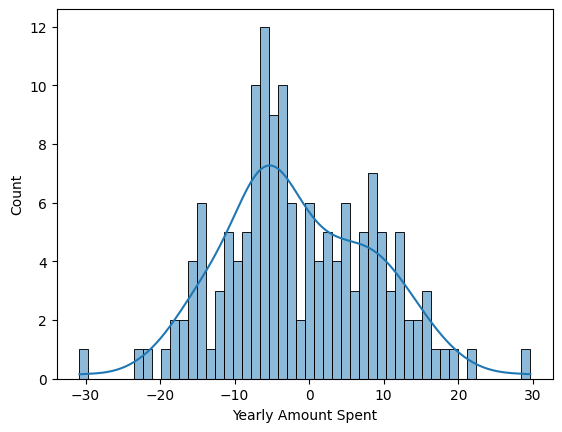

In [42]:
sns.histplot(y_test - y_pred,bins=50,kde = True)

In [43]:
coeffecients = pd.DataFrame(lr.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


**Interpreting the coefficients:**

When all other factors remain constant, each additional unit of Average Session Length corresponds to an increase of $25.72 in total spending.

For every 1-unit increase in Time on App, total spending increases by $38.59, assuming all other variables stay the same.

A 1-unit increase in Time on Website leads to an increase of just $0.45 in total spending, while holding all other factors constant.

Finally, each additional unit of Length of Membership is linked to an increase of $61.67 in total spending, with other features remaining unchanged.

# Conclusion

Should the company focus more on their mobile app or website?

This is a nuanced question with two potential approaches: Either improve the website to match the performance of the mobile app, or continue enhancing the app since it’s currently more successful. The right answer depends on various factors within the company. It would be essential to explore how customers’ Length of Membership relates to their use of the app or website before making a decision.